If not having prince library in your environment please install using:

```pip install --user prince```

in the terminal (command prompt)

# LIBRARIES


In [1]:
import pandas as pd
import prince
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\TCHANDO\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\TCHANDO\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# LOAD DATASET

In [2]:
data = sns.load_dataset('titanic').dropna(subset=['age'])
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Data Transformation**

In [3]:
data['age_bin'] = pd.cut(data['age'],
                         [0, 18, 30, 45, 999])

data['age_bin'].value_counts().sort_index()

age_bin
(0, 18]      139
(18, 30]     270
(30, 45]     202
(45, 999]    103
Name: count, dtype: int64

In [ ]:
df = data[['sex', 'embarked', 'age_bin',"alive"]]


# MCA

In [33]:
# Perform MCA
mca = prince.MCA(n_components=3)
mca.fit(df)

# Get category coordinates
coordinates = mca.column_coordinates(df)


In [43]:
coordinates.columns

Index([0, 1, 2, 'Variables'], dtype='object')

For getting the legend of the points

In [ ]:
coordinates["Variables"] = ["Sex", "Sex", "Embarked", "Embarked", "Embarked", "Age", "Age", "Age", "Age", "Alive", "Alive"]
coordinates["Variables"] = coordinates["Variables"]
coordinates

,0,1,2,Variables
sex__female,1.089387,-0.174756,-0.134079,Sex
sex__male,-0.625860,0.101185,0.077418,Sex
embarked__C,0.820831,1.200377,0.306068,Embarked
embarked__Q,-0.018875,-2.009014,3.580826,Embarked
embarked__S,-0.196077,-0.181360,-0.253211,Embarked
"age_bin__(0, 18]",0.612258,-0.481672,0.764912,Age
"age_bin__(18, 30]",-0.240804,0.099660,-0.681146,Age
"age_bin__(30, 45]",-0.005640,-0.685750,-0.111702,Age
"age_bin__(45, 999]",-0.176039,1.735838,0.973070,Age
alive__no,-0.701034,-0.010172,0.122979,Alive


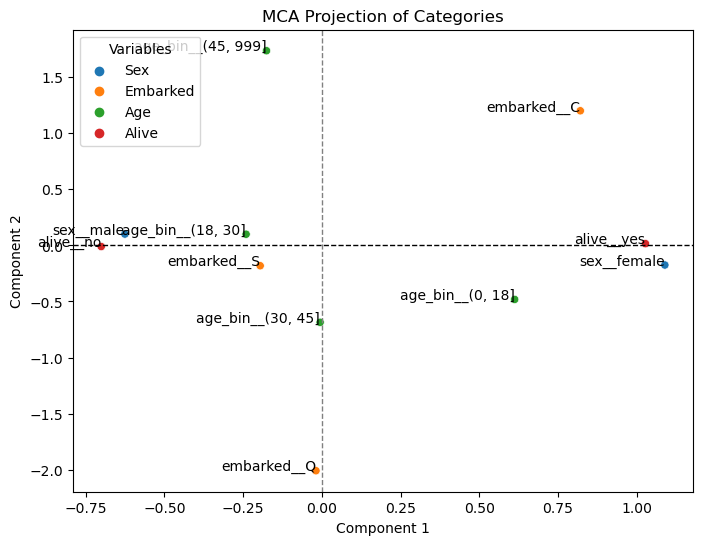

In [45]:

# Plot the category points
plt.figure(figsize=(8, 6))
sns.scatterplot(data = coordinates, x=0, y=1, hue="Variables")

# Add labels for categories
for label, (x, y) in zip(coordinates.index, zip(coordinates[0], coordinates[1])):
    plt.annotate(label, (x, y), fontsize=10, ha='right')

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("MCA Projection of Categories")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
# plt.grid(True)
plt.show()